In [304]:
import numpy as np
from plotnine import *
import pandas as pd

In [305]:
results = pd.read_csv("benchmark_results.csv", sep='\t')

In [306]:
nbse_info = pd.read_csv("nbse_sets.csv")

In [307]:
data = results.merge(nbse_info, left_on=['name'], right_on=['set_name'])
data['mcs_size_to_atom_size'] = data['mcs_atoms'] / data['avg_atoms']
data = data.query('local_similarity > 0 and took < 900')
data.set_index(['name', 'optimizer_steps', 'optimizer_fine', 'optimizer_coarse', 'num_conformers', 'core', 'assemblies'])

,,,,,,,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,divide,set_name,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,avg_atoms_to_mcs,mcs_size_to_atom_size
name,optimizer_steps,optimizer_fine,optimizer_coarse,num_conformers,core,assemblies,,,,,,,,,,,,,,,,
3ke8,100,0.01,0.3,40,mcs,10,18,0.664895,0.629946,2.792387,True,3ke8,17,17,12,11,11,17,14.647,NaN,75.10%,0.751007
2vke,100,0.01,0.3,40,mcs,10,218,0.653470,0.613581,2.697748,True,2vke,42,45,31,34,22,12,33.522,NaN,65.63%,0.656285
1odn,100,0.01,0.3,40,mcs,10,303,0.569305,0.657672,3.152543,True,1odn,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
4dko,100,0.01,0.3,40,mcs,10,43,0.579109,0.458960,4.240663,True,4dko,30,33,23,24,15,13,26.077,NaN,57.52%,0.575220
3qqs,100,0.01,0.3,40,mcs,10,48,0.619915,0.311268,5.187691,True,3qqs,29,31,10,10,8,19,14.789,NaN,54.09%,0.540943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1d0s,100,0.05,0.5,20,mcs,10,35,0.623788,0.428495,2.812736,True,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%,0.318590
2w0v,100,0.05,0.5,20,mcs,10,97,0.384556,0.543644,6.831058,True,2w0v,39,41,17,18,9,12,28.417,NaN,31.67%,0.316712
2bzs,100,0.05,0.5,20,mcs,10,408,0.493460,0.296710,5.342589,True,2bzs,37,41,11,11,6,40,19.176,NaN,31.29%,0.312891


In [308]:
data.describe()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,mcs_size_to_atom_size
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,0.0,216.000000
mean,127.254630,0.519184,0.468874,4.089990,0.412963,0.015185,27.453704,6.083333,100.0,31.509259,34.055556,15.250000,15.884259,9.365741,17.101852,22.607907,NaN,0.415384
std,109.983656,0.096809,0.112232,1.403953,0.099387,0.013467,16.885323,4.472396,0.0,8.541004,9.541423,4.840959,5.531351,3.585570,6.115082,5.632526,NaN,0.114169
min,1.000000,0.307021,0.174775,1.647598,0.300000,0.010000,10.000000,1.000000,100.0,12.000000,12.000000,9.000000,9.000000,4.000000,12.000000,10.769000,NaN,0.298533
25%,43.000000,0.449279,0.387418,2.913379,0.300000,0.010000,10.000000,1.000000,100.0,26.000000,29.000000,11.000000,11.000000,7.000000,13.000000,19.176000,NaN,0.324675
50%,101.000000,0.534781,0.479487,3.841933,0.500000,0.010000,20.000000,10.000000,100.0,30.000000,32.000000,14.000000,15.000000,9.000000,15.000000,21.560000,NaN,0.375834
75%,180.500000,0.598536,0.539968,5.146633,0.500000,0.010000,40.000000,10.000000,100.0,37.000000,41.000000,18.000000,20.000000,11.000000,19.000000,26.077000,NaN,0.475160
max,851.000000,0.719335,0.737755,8.482188,0.500000,0.050000,60.000000,10.000000,100.0,73.000000,80.000000,31.000000,34.000000,22.000000,40.000000,37.294000,NaN,0.751007


In [309]:
metrics = data.drop(columns=['set_name', 'name', 'divide', 'core', 'mcs_bonds', 'avg_atoms_to_mcs'])
metrics.var()

took                           12096.404630
local_similarity                   0.009372
avg_conformer_tanimoto_dist        0.012596
siena_rmsd                         1.971084
optimizer_coarse                   0.009878
optimizer_fine                     0.000181
num_conformers                   285.114126
assemblies                        20.002326
optimizer_steps                    0.000000
most_atoms                        72.948751
most_bonds                        91.038760
least_atoms                       23.434884
least_bonds                       30.595844
mcs_atoms                         12.856309
num_mols                          37.394229
avg_atoms                         31.725354
mcs_size_to_atom_size              0.013035
dtype: float64

In [310]:
metrics.head()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_size_to_atom_size
0,18,0.664895,0.629946,2.792387,0.3,0.01,40,10,100,17,17,12,11,11,17,14.647,0.751007
1,218,0.653470,0.613581,2.697748,0.3,0.01,40,10,100,42,45,31,34,22,12,33.522,0.656285
2,303,0.569305,0.657672,3.152543,0.3,0.01,40,10,100,30,29,18,17,15,28,24.251,0.618531
3,43,0.579109,0.458960,4.240663,0.3,0.01,40,10,100,30,33,23,24,15,13,26.077,0.575220
4,48,0.619915,0.311268,5.187691,0.3,0.01,40,10,100,29,31,10,10,8,19,14.789,0.540943


In [311]:
correlations = metrics.corr(method='spearman')
correlations.head()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_size_to_atom_size
took,1.000000,-0.359620,0.054446,0.258622,-0.165268,-0.066648,0.002072,0.120113,NaN,0.446810,0.398430,0.305578,0.266082,0.091735,0.400467,0.310499,-0.184710
local_similarity,-0.359620,1.000000,-0.090987,-0.792550,-0.012430,0.038684,0.026845,0.038639,NaN,-0.488640,-0.506330,-0.186885,-0.256352,0.115164,0.017104,-0.375474,0.584884
avg_conformer_tanimoto_dist,0.054446,-0.090987,1.000000,0.065944,-0.021416,-0.017021,0.019892,0.009884,NaN,0.359155,0.313639,0.658544,0.641691,0.611376,-0.209048,0.622436,0.130392
siena_rmsd,0.258622,-0.792550,0.065944,1.000000,-0.019844,-0.030615,0.004579,-0.000899,NaN,0.458862,0.495162,0.127657,0.202143,-0.139746,0.054608,0.251206,-0.462822
optimizer_coarse,-0.165268,-0.012430,-0.021416,-0.019844,1.000000,0.338754,0.150623,-0.770492,NaN,-0.012082,-0.012984,-0.003536,-0.003763,0.001058,0.006273,-0.013860,0.025996


In [312]:
corr = correlations.stack().reset_index()
corr.columns = ['var1', 'var2', 'val']

metric_cols = ['took', 'siena_rmsd', 'avg_conformer_tanimoto_dist', 'local_similarity']
corr_config = corr[corr['var2'].isin(metric_cols)]
corr_config = corr_config[~corr_config['var1'].isin(metric_cols)]

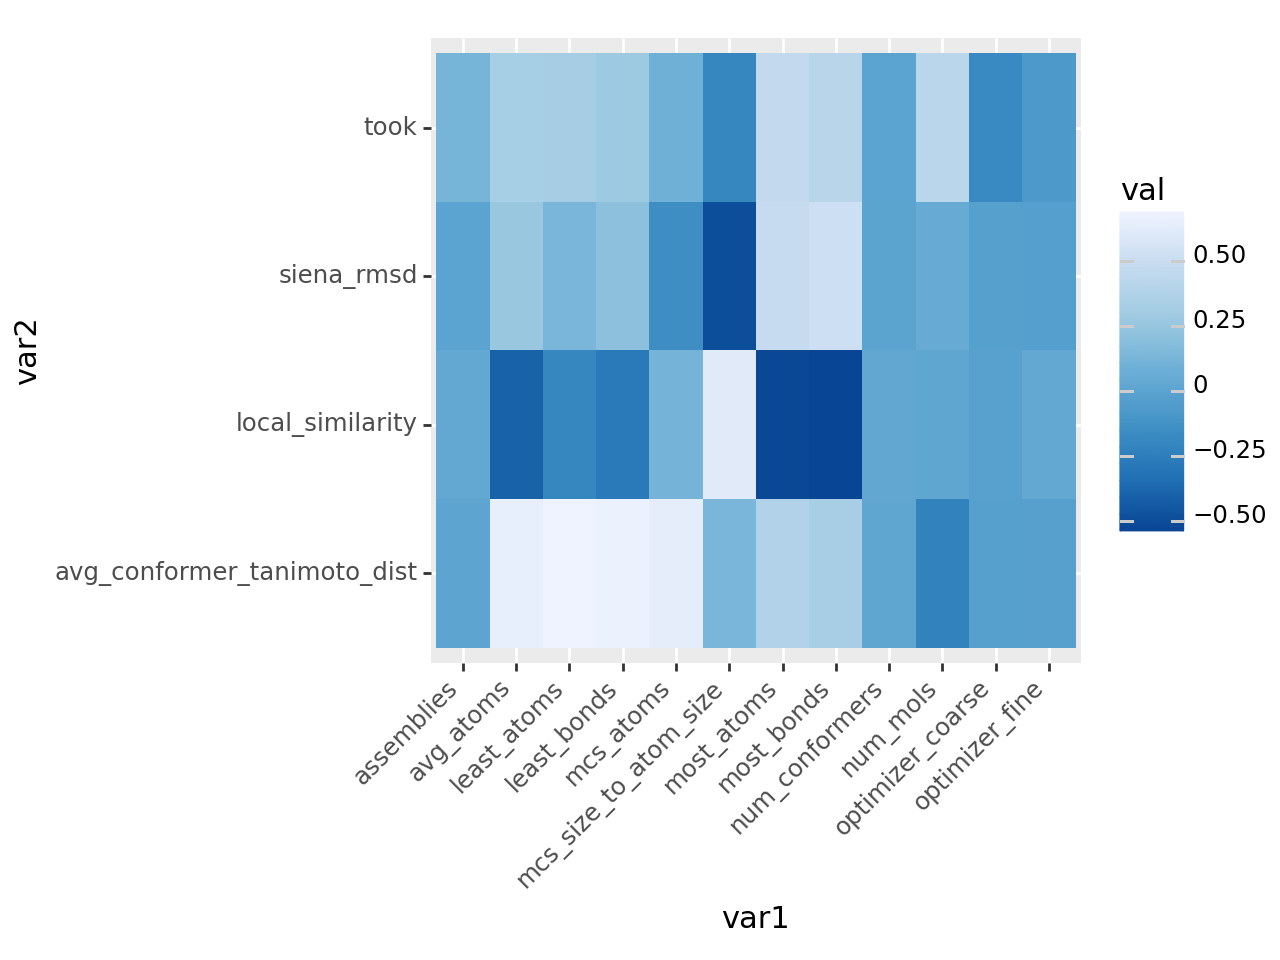

<Figure Size: (640 x 480)>

In [313]:
(ggplot(corr_config, mapping=aes('var1', 'var2', fill='val'))
 + geom_tile()
 + scale_fill_distiller()
 + theme(axis_text_x=element_text(rotation=45, hjust=1)))

In [314]:
corr_metrics = corr[corr['var1'].isin(metric_cols) & corr['var2'].isin(metric_cols)]

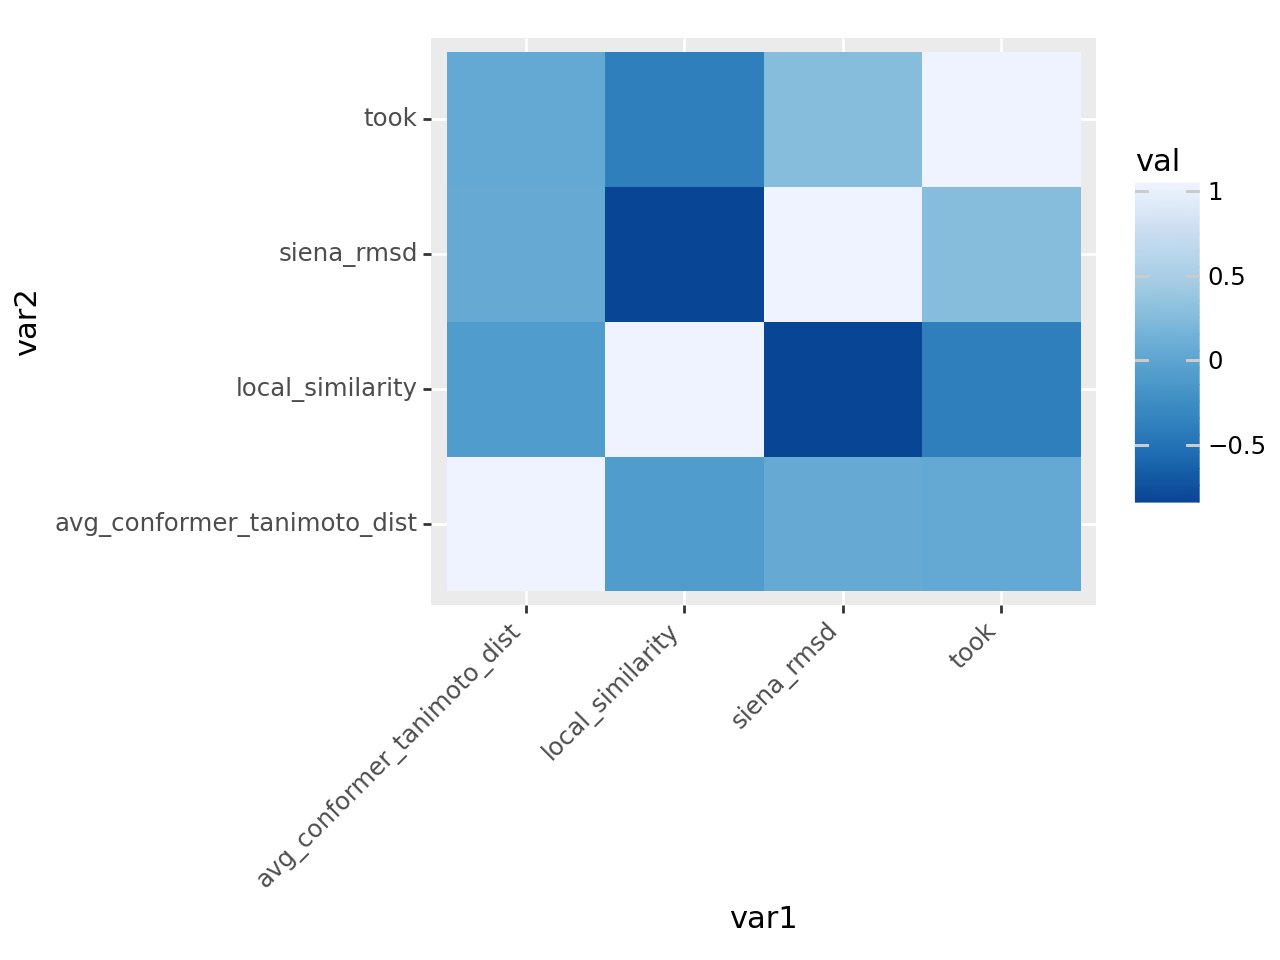

<Figure Size: (640 x 480)>

In [315]:
(ggplot(corr_metrics, mapping=aes('var1', 'var2', fill='val'))
 + geom_tile()
 + scale_fill_distiller()
 + theme(axis_text_x=element_text(rotation=45, hjust=1)))


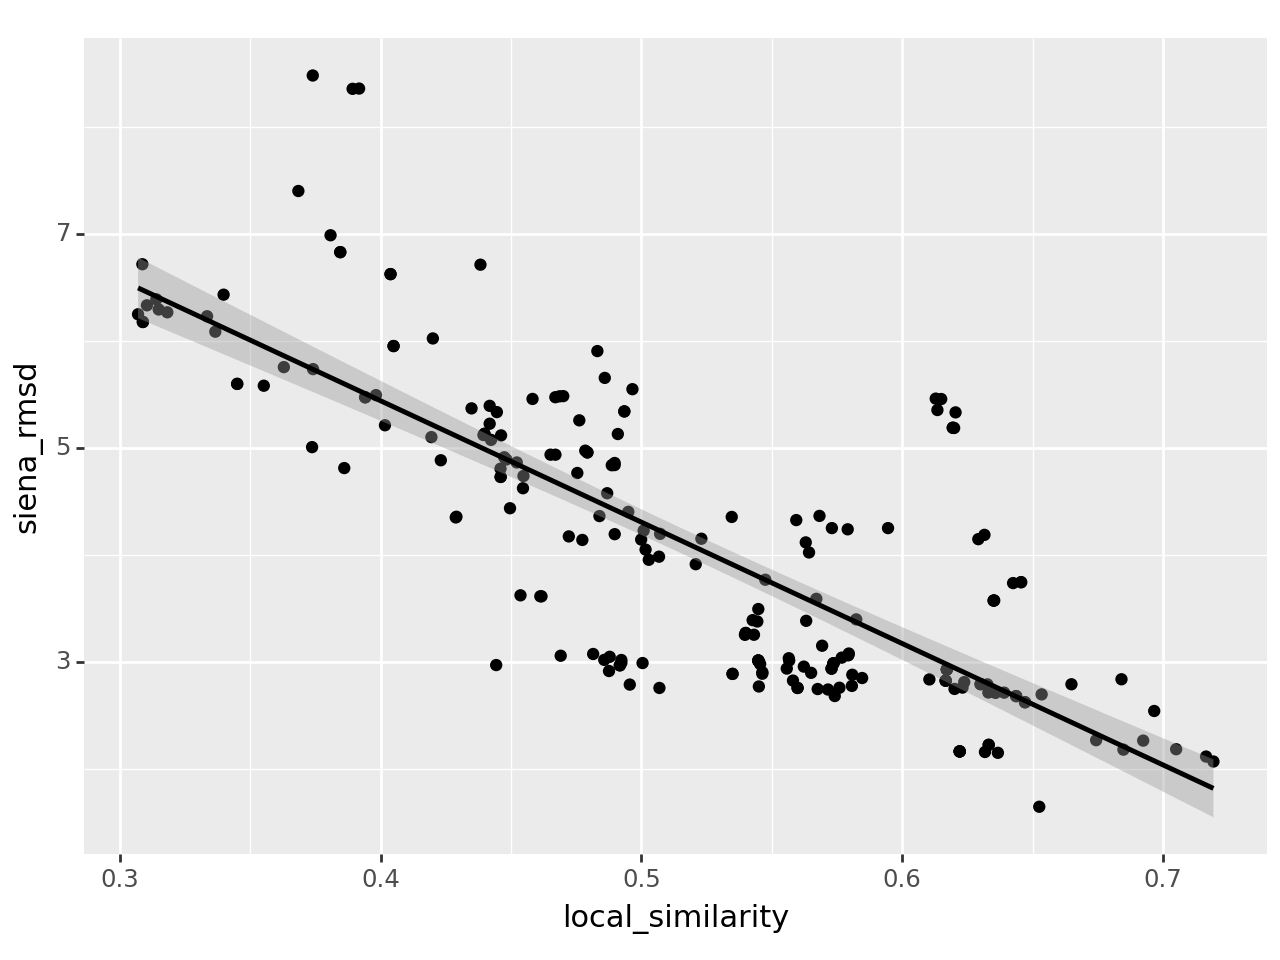

<Figure Size: (640 x 480)>

In [316]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))

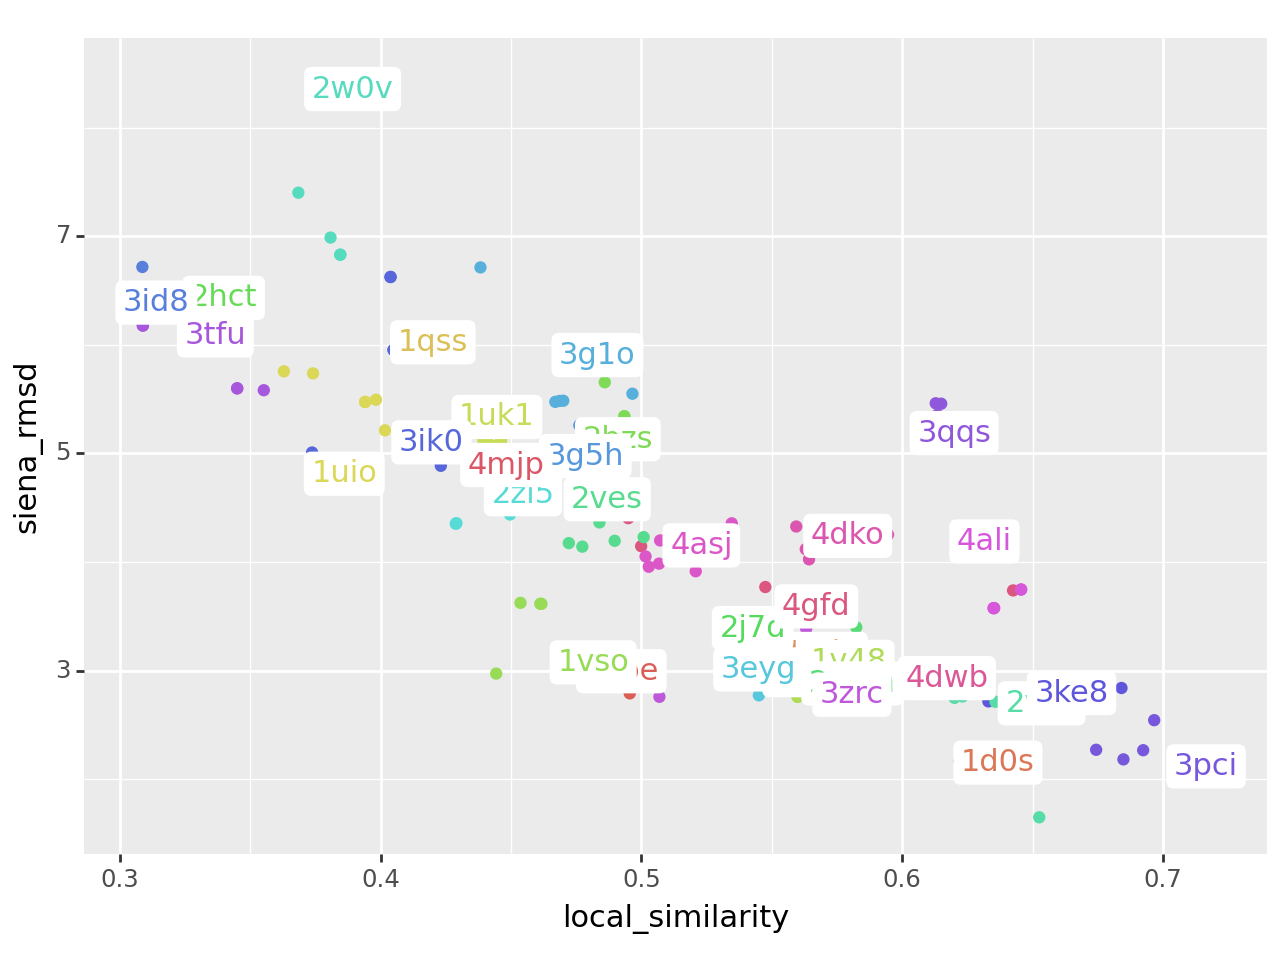

<Figure Size: (640 x 480)>

In [317]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


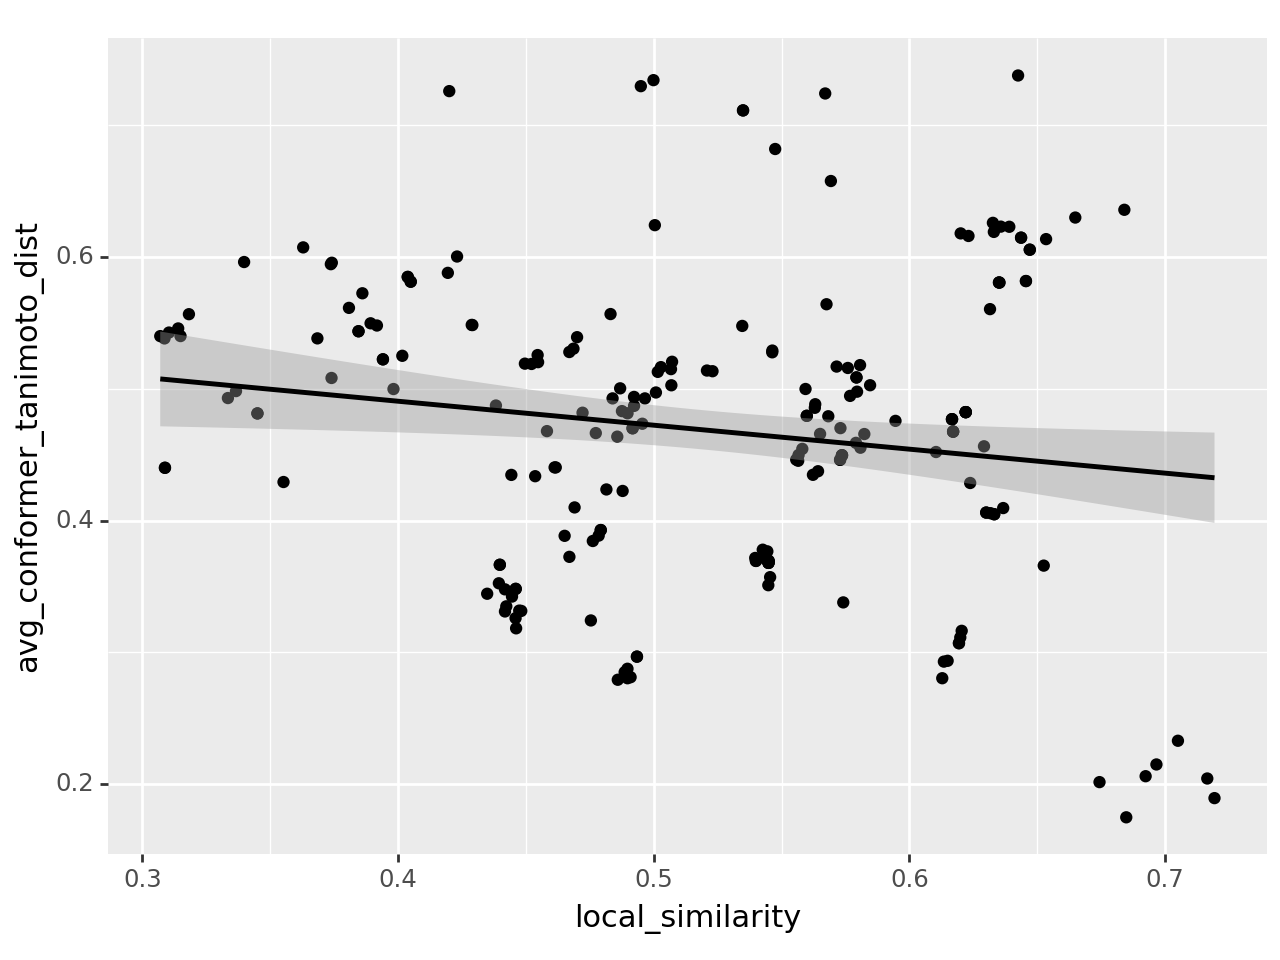

<Figure Size: (640 x 480)>

In [318]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='avg_conformer_tanimoto_dist'))
 + geom_point()
 + geom_smooth(method='lm'))

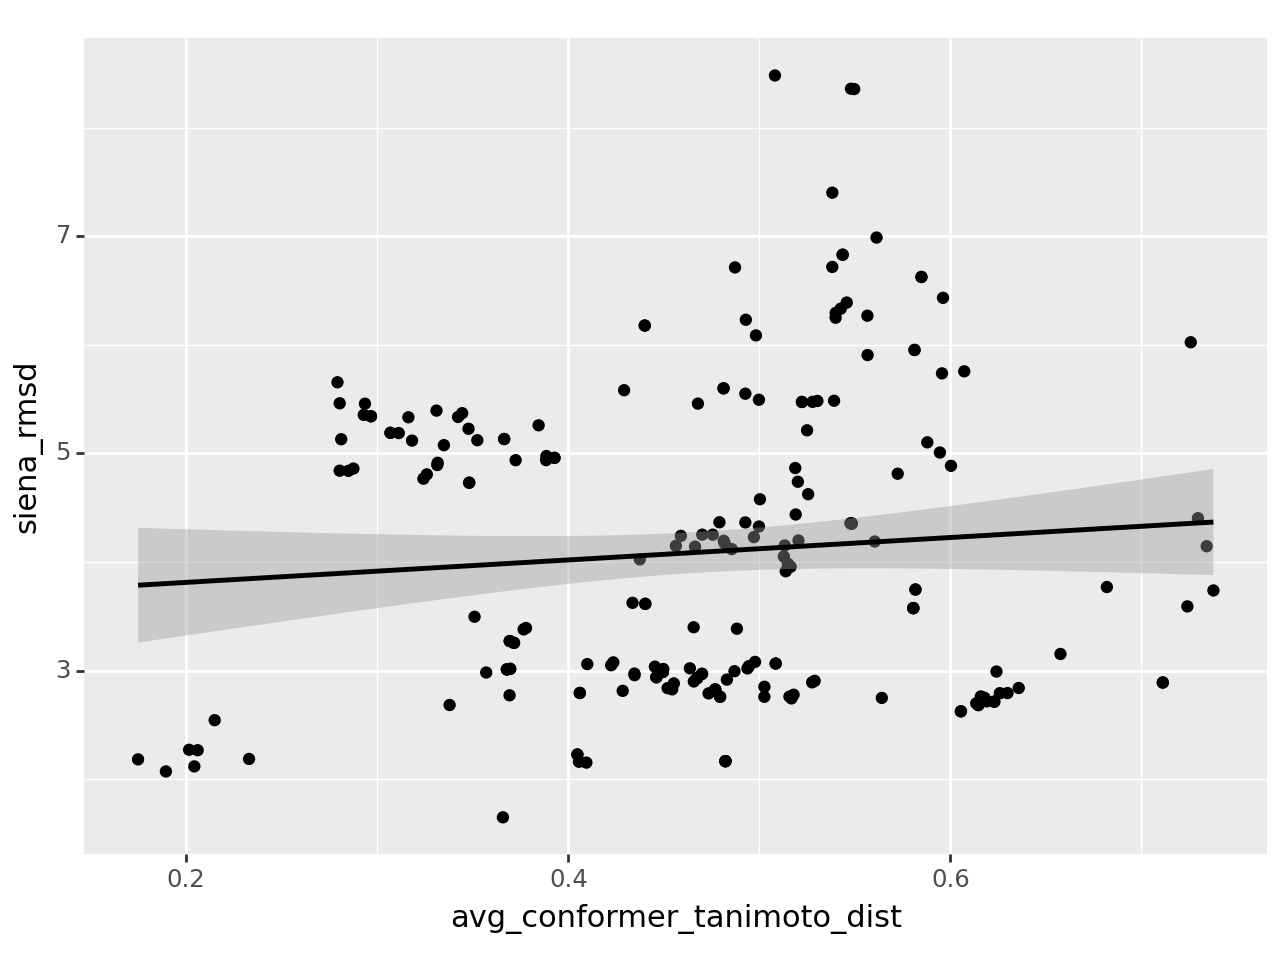

<Figure Size: (640 x 480)>

In [319]:
(ggplot(data=data, mapping=aes(x='avg_conformer_tanimoto_dist', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))


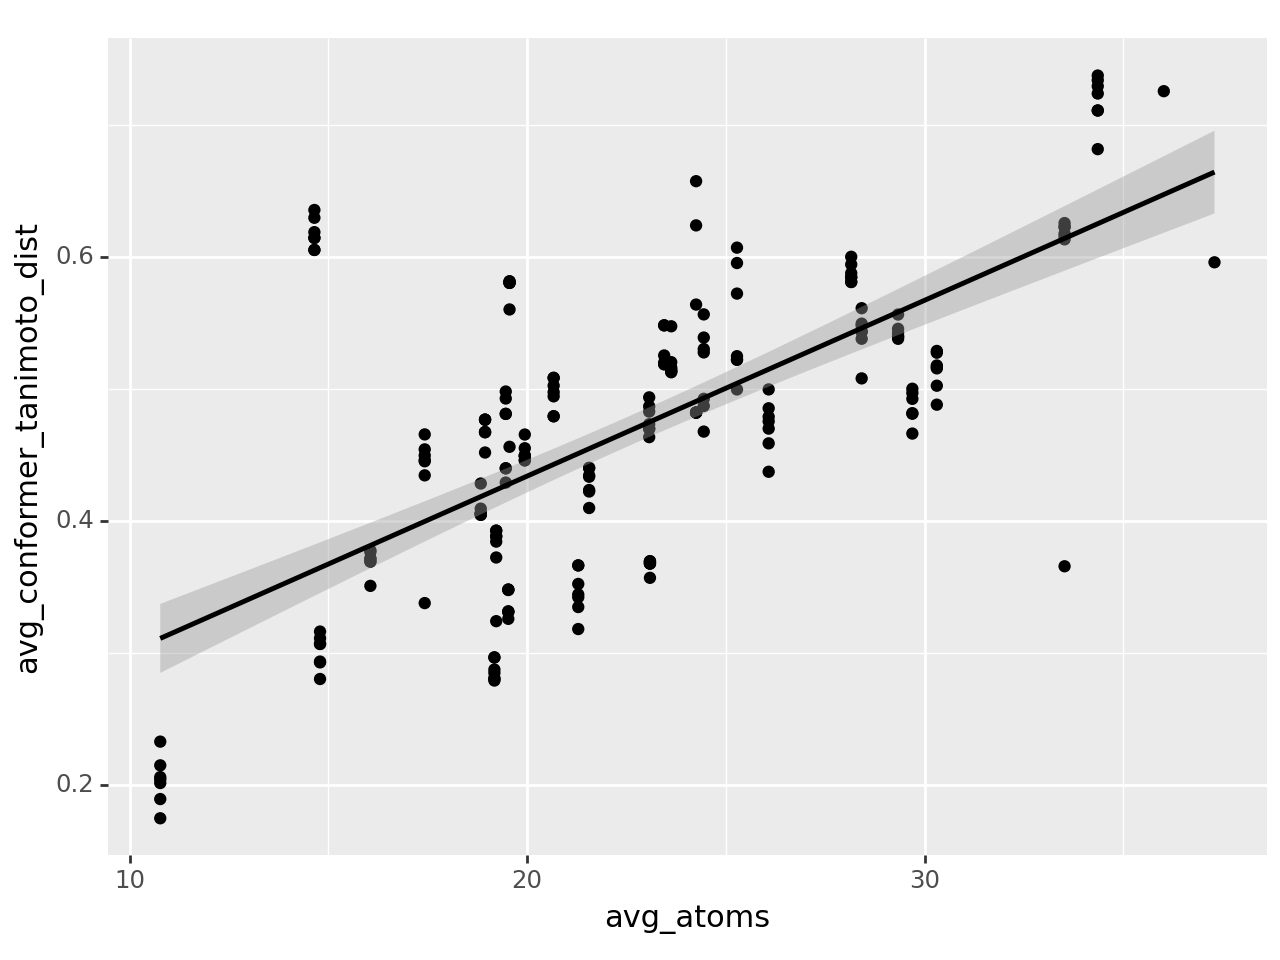

<Figure Size: (640 x 480)>

In [320]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist'))
 + geom_point()
 + geom_smooth(method='lm'))

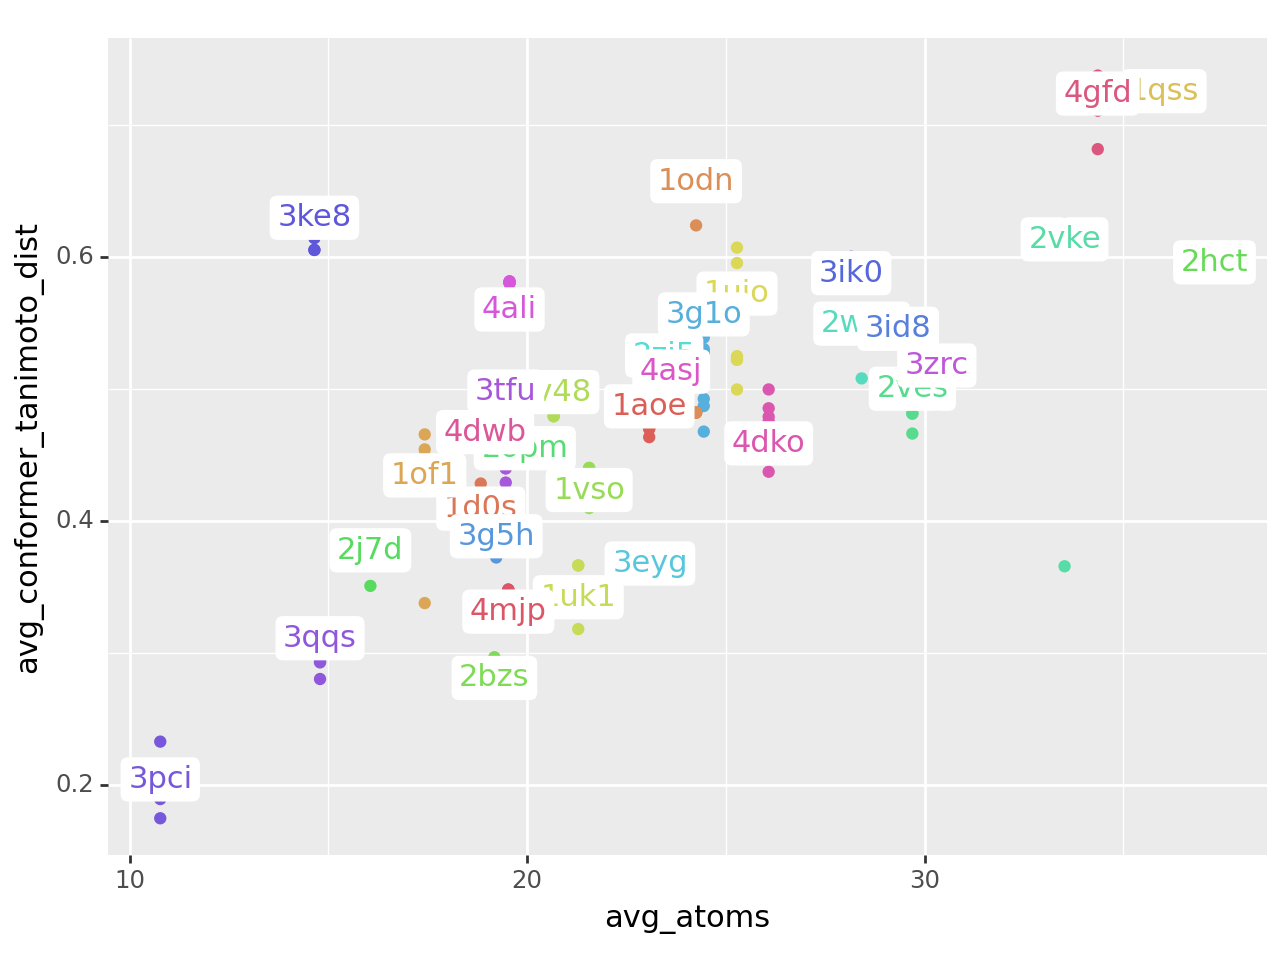

<Figure Size: (640 x 480)>

In [321]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


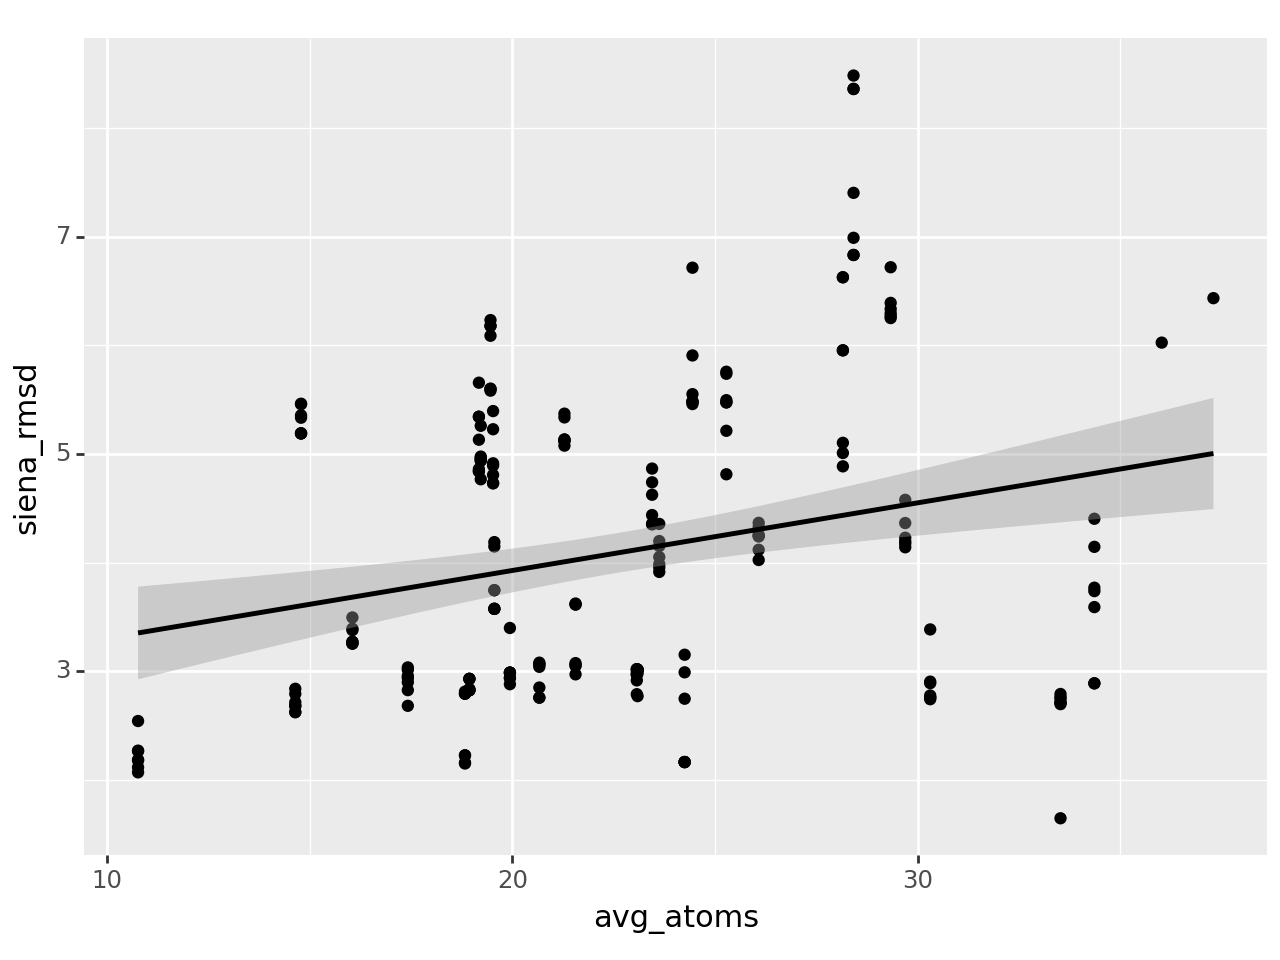

<Figure Size: (640 x 480)>

In [322]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))

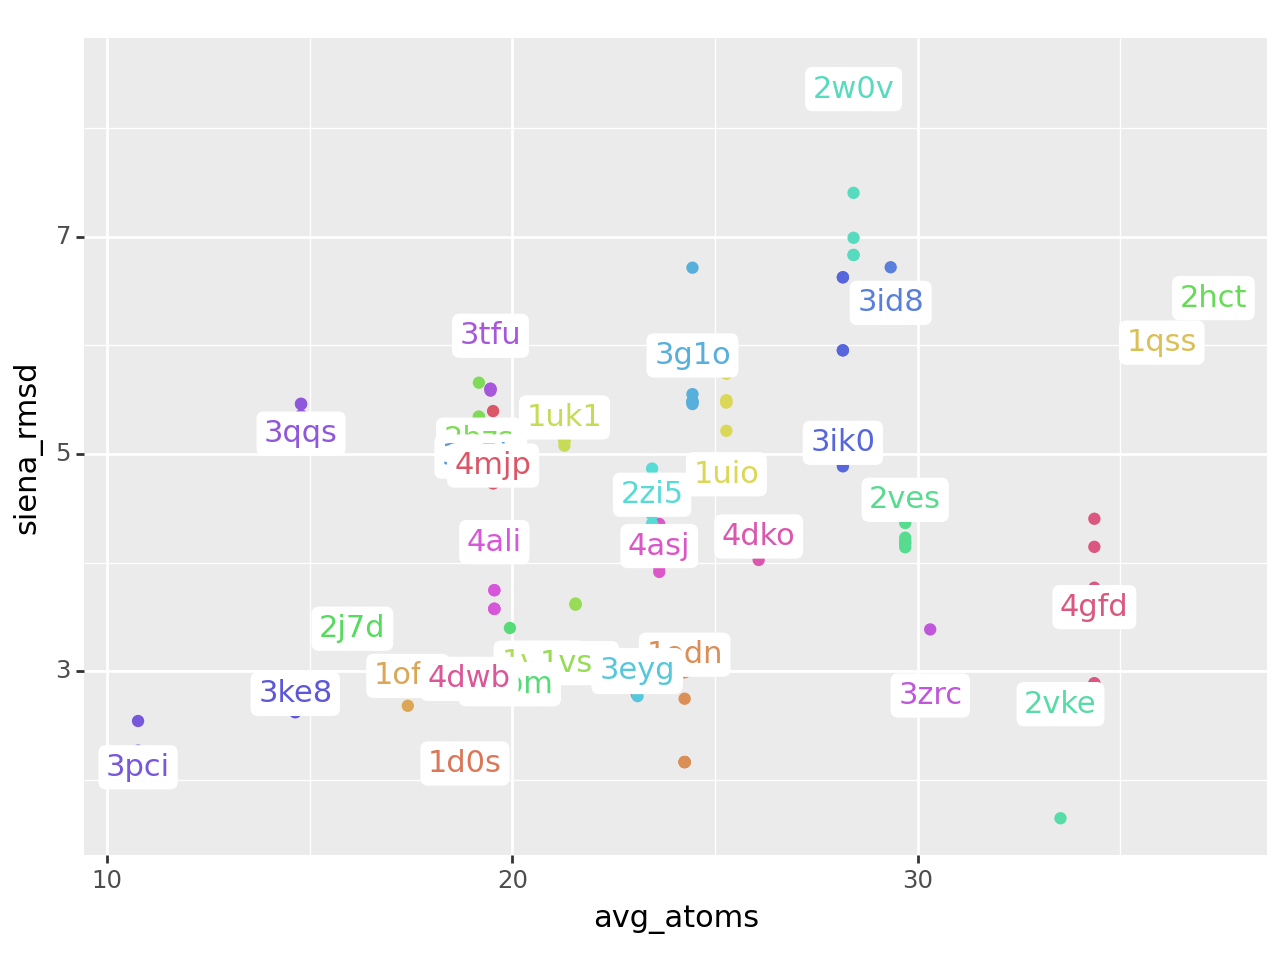

<Figure Size: (640 x 480)>

In [323]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )


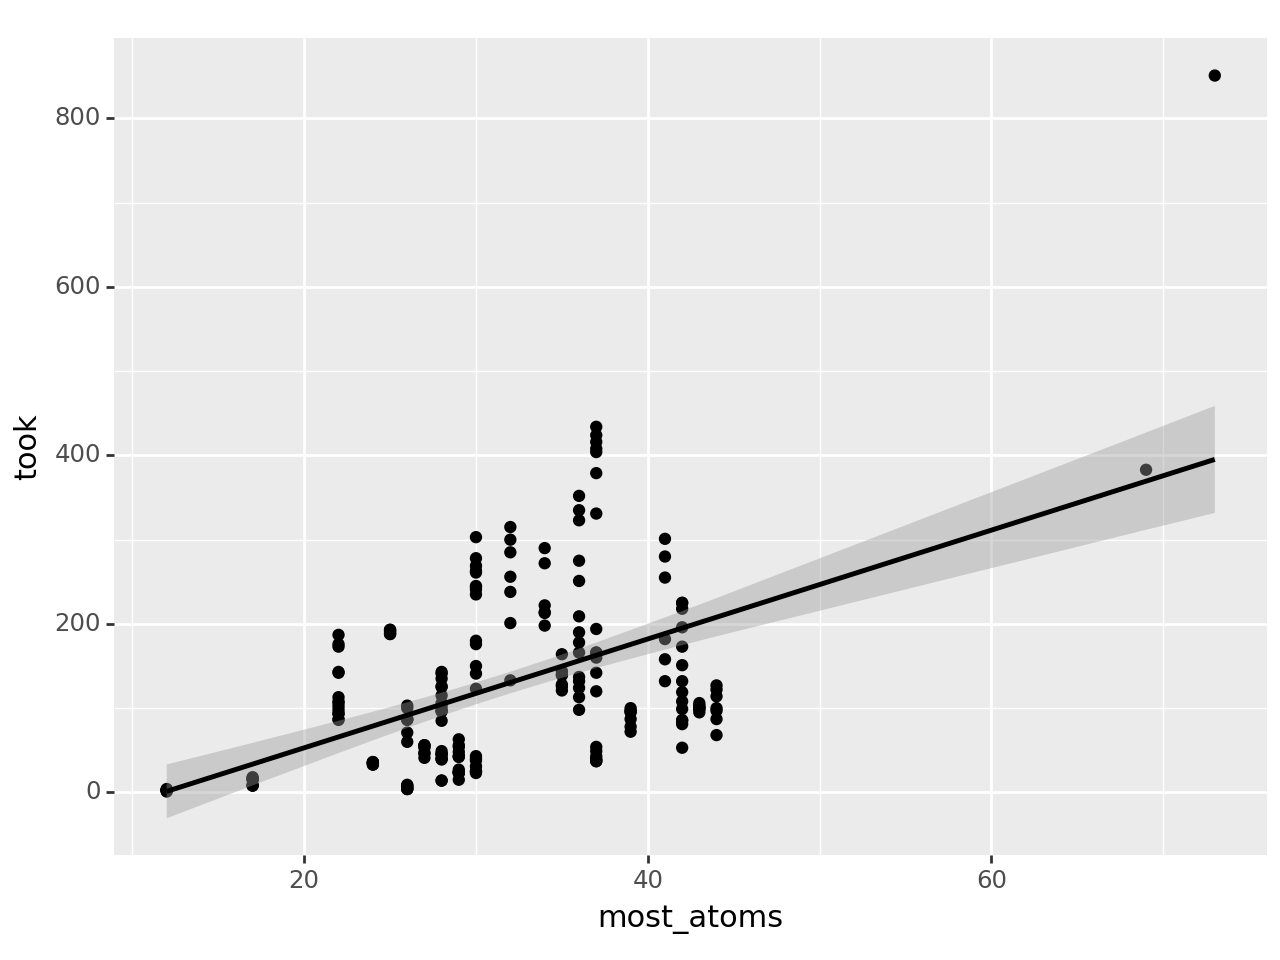

<Figure Size: (640 x 480)>

In [324]:
(ggplot(data=data, mapping=aes(x='most_atoms', y='took'))
 + geom_point()
 + geom_smooth(method='lm'))

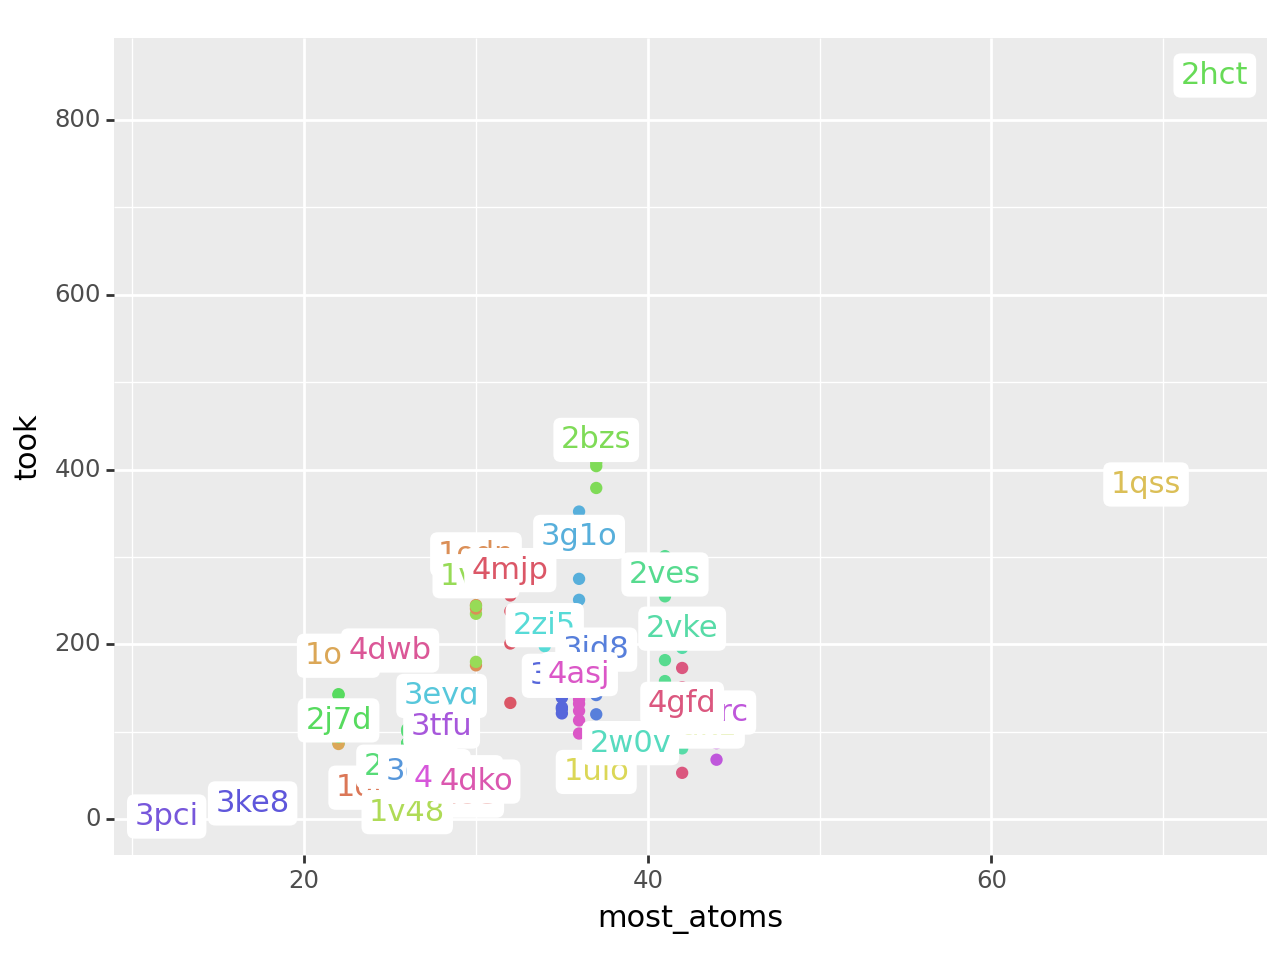

<Figure Size: (640 x 480)>

In [325]:
(ggplot(data=data, mapping=aes(x='most_atoms', y='took', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )

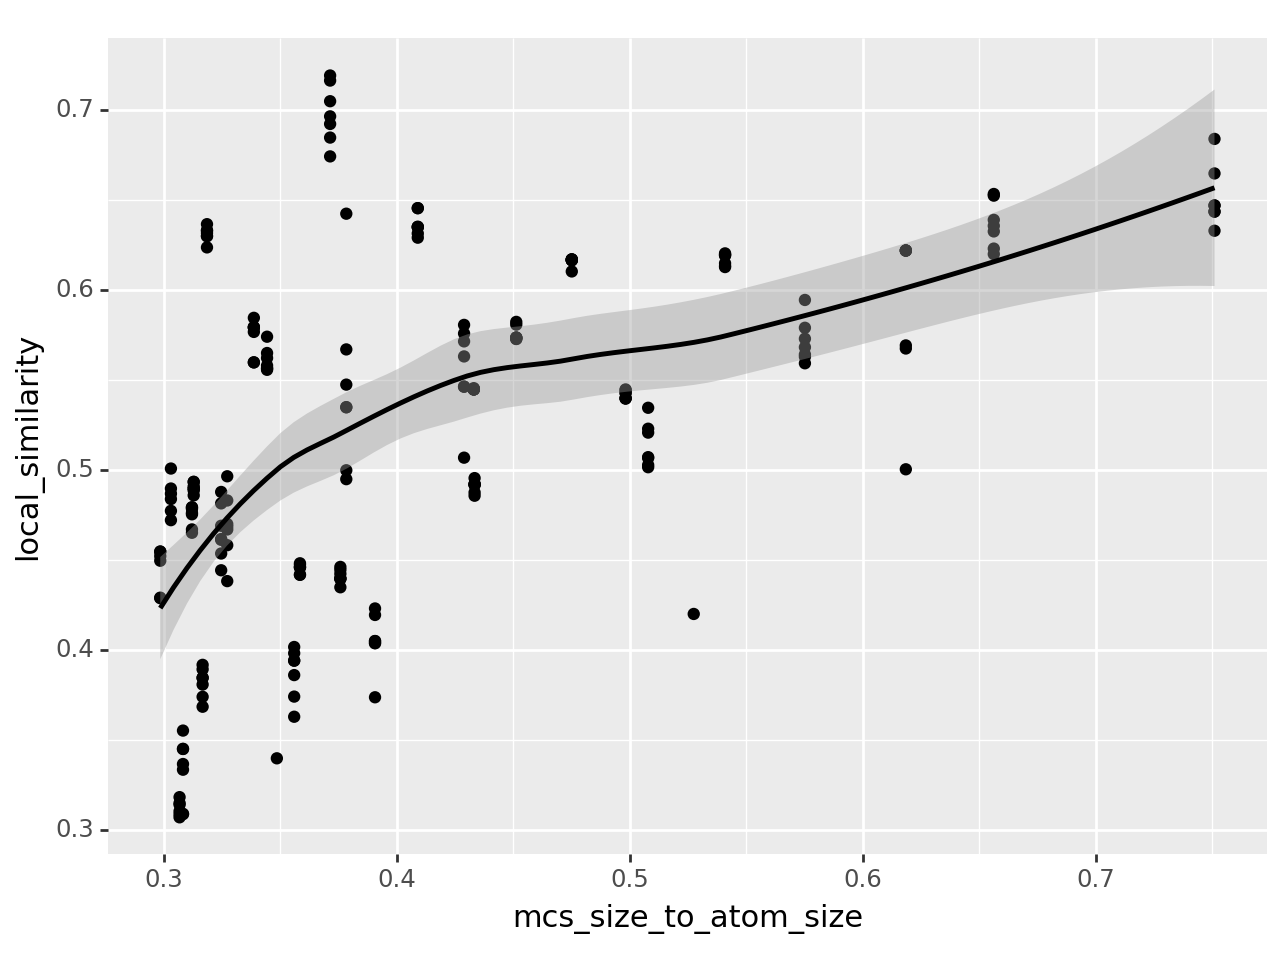

<Figure Size: (640 x 480)>

In [331]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity'))
 + geom_point()
 + geom_smooth(method='loess'))


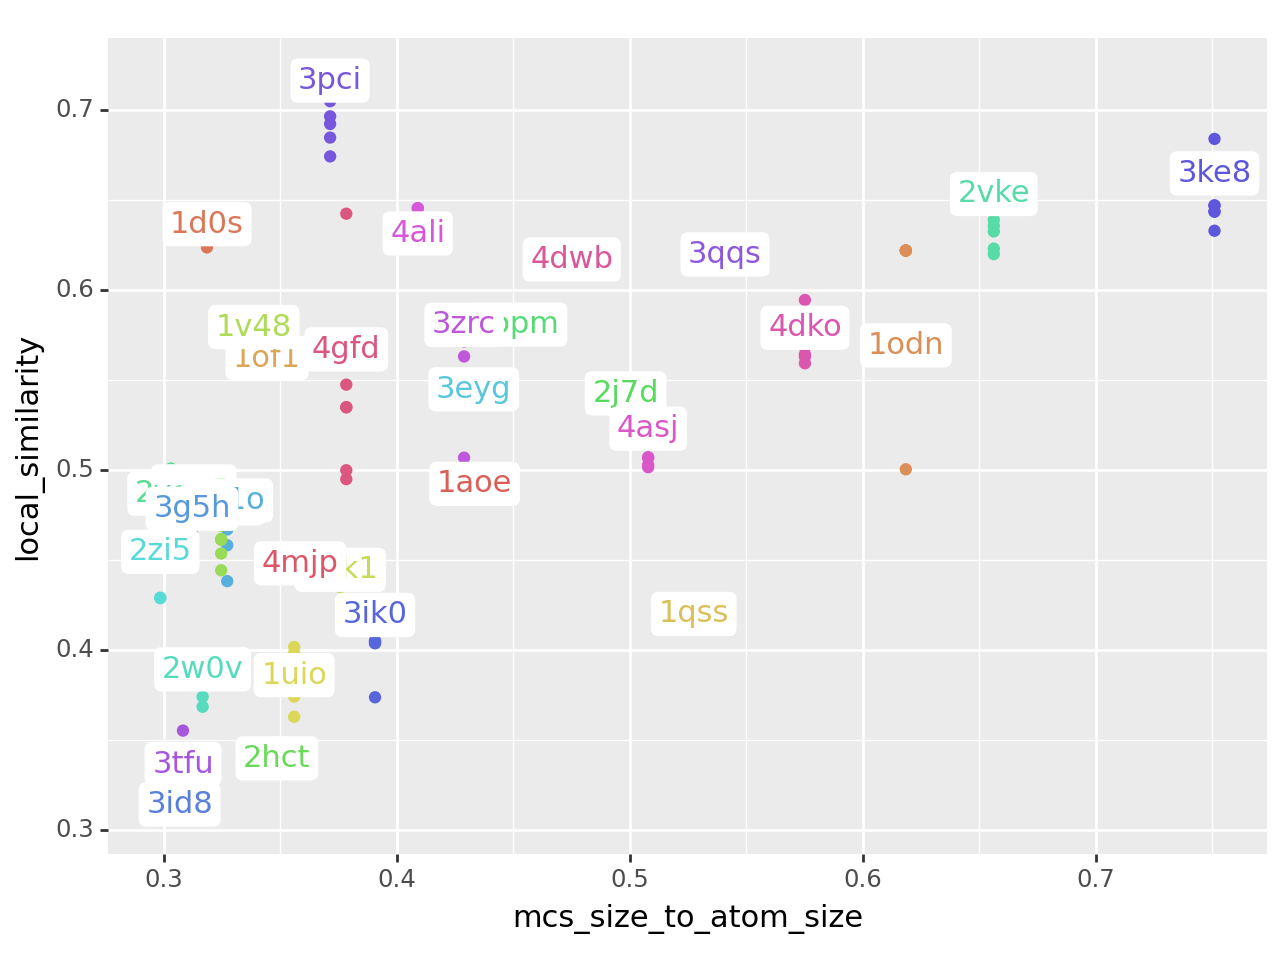

<Figure Size: (640 x 480)>

In [329]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1,1,1,0) )
 +scale_color_discrete(guide=False)
 )
